In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
file_dir = Path(r"C:\Users\user\Desktop\div\data\files")
cars_csv_path = file_dir / "car-sales-extended-missing-data.csv"
housing_csv_path = file_dir / "housing.csv"

In [3]:
df = pd.read_csv(cars_csv_path)
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


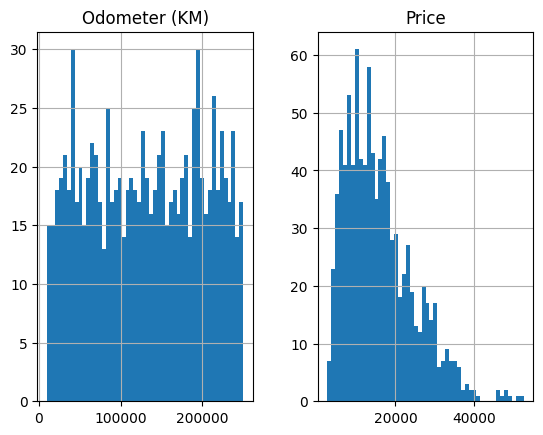

In [4]:
# df.select_dtypes(include='number').hist()
cols_num = ['Odometer (KM)', 'Price']
df[cols_num].hist(bins=50)
plt.show()

In [5]:
# from sklearn.ensemble import IsolationForest
# iso_f = IsolationForest(n_estimators=200, contamination=0.01)
# pred = iso_f.fit_predict(df[['Price']])
# outliers_mask = pred == -1

# plt.hist(df.loc[~outliers_mask, 'Price'], bins=50, color='b')
# plt.hist(df.loc[outliers_mask, 'Price'], bins=50, color='r')
# plt.show()

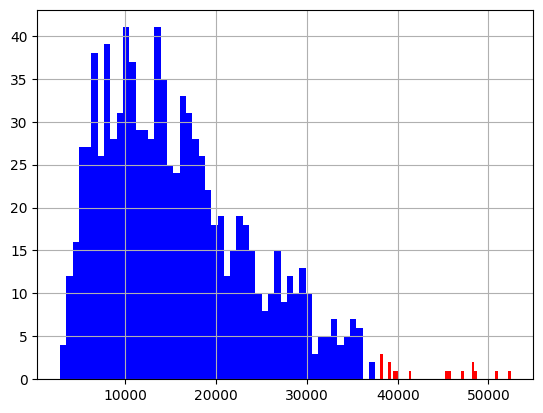

In [6]:
# m = df['Price'].median()
q1, m, q3 = df['Price'].quantile([0.25,0.5, 0.75])

iqr = np.abs(q1 - q3)
lower_limit = q1 - 1.5*iqr 
upper_limit = q3 + 1.5*iqr 

upper_outlier = df['Price'] > upper_limit
lower_outlier = df['Price'] < lower_limit

outlier_mask = upper_outlier | lower_outlier
df.loc[outlier_mask, 'Price'].hist(bins=50, color='red')
df.loc[~outlier_mask, 'Price'].hist(bins=50, color='blue')
plt.show()

In [7]:
df2 = df.loc[~outlier_mask]
df2

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           936 non-null    object 
 1   Colour         935 non-null    object 
 2   Odometer (KM)  935 non-null    float64
 3   Doors          935 non-null    float64
 4   Price          934 non-null    float64
dtypes: float64(3), object(2)
memory usage: 46.1+ KB


In [9]:
num_cols = ['Odometer (KM)', 'Price']
cat_cols = ['Make', 'Colour', 'Doors']

from sklearn.impute import SimpleImputer

ss_num = SimpleImputer(strategy ='median')
output_num = ss_num.fit_transform(df2[num_cols])

ss_cat = SimpleImputer(strategy='most_frequent')
output_cat = ss_cat.fit_transform(df2[cat_cols])

In [10]:
df2.loc[:, num_cols] = output_num
df2.loc[:, cat_cols] = output_cat
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           984 non-null    object 
 1   Colour         984 non-null    object 
 2   Odometer (KM)  984 non-null    float64
 3   Doors          984 non-null    float64
 4   Price          984 non-null    float64
dtypes: float64(3), object(2)
memory usage: 46.1+ KB


In [11]:
df2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [18]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
output = ord_enc.fit_transform(df2[['Make']])
# np.unique_counts(output)
# ord_enc.inverse_transform(output)
output

array([[1.],
       [0.],
       [1.],
       [3.],
       [2.],
       [1.],
       [3.],
       [1.],
       [3.],
       [1.],
       [2.],
       [2.],
       [2.],
       [3.],
       [1.],
       [3.],
       [3.],
       [0.],
       [2.],
       [2.],
       [3.],
       [1.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [2.],
       [3.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [1.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],
       [1.],
       [3.],
       [3.],
       [3.],
       [1.],
       [0.],
       [3.],
       [3.],
       [0.],
       [1.],
       [1.],
       [1.],
       [3.],
       [0.],
       [3.],
       [3.],
       [3.],
       [0.],
       [2.],
       [3.],
       [1.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],

In [19]:
pd.DataFrame(output, columns=ord_enc.get_feature_names_out())

,Make
0,1.0
1,0.0
2,1.0
3,3.0
4,2.0
...,...
979,3.0
980,3.0
981,2.0
982,1.0


In [13]:
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(sparse_output=False)
output_onehot = onehot_enc.fit_transform(df2[['Make']])
output_onehot

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [16]:
pd.DataFrame(output_onehot, columns=onehot_enc.get_feature_names_out())

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
979,0.0,0.0,0.0,1.0
980,0.0,0.0,0.0,1.0
981,0.0,0.0,1.0,0.0
982,0.0,1.0,0.0,0.0
